
# Module 2 - Exercise 6

neural networks.

implication for the world large language models and image processing. mention K nearest neighbours and cite answers to 6.
Choose journal style and say in email which - google Q1 Informatics Journals and choose one.


In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("C:/Users/chloe/Freiburg Uni/ERASMUS/Data_Science_Course/LCD_WP2/abalone.csv", sep = ";", decimal=",")
df

,sexo,comprimento,diametro,altura,peso total,peso carne,peso visceras,peso concha,aneis
0,M,0.46,0.37,0.10,0.51,0.22,0.10,0.15,15
1,M,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7
2,F,0.53,0.42,0.14,0.68,0.26,0.14,0.21,9
3,M,0.44,0.37,0.13,0.52,0.22,0.11,0.16,10
4,I,0.33,0.26,0.08,0.21,0.09,0.04,0.06,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.57,0.45,0.17,0.89,0.37,0.24,0.25,11
4173,M,0.59,0.44,0.14,0.97,0.44,0.21,0.26,10
4174,M,0.60,0.48,0.21,1.18,0.53,0.29,0.31,9
4175,F,0.63,0.49,0.15,10.95,0.53,0.26,0.30,10


Not sure how to handle sex. Can remove immature and have as binary.
Or keep all the columns with get_dummies.

Decided to leave in as same patterns in residuals just more data points which seems useful.

In [3]:
# numerical encoding for sex - allowing for immature.
# Remove immature rows first
df_sex = df[df['sexo'] != "I"].copy()

# Encode M=0, F=1
df_sex['sexo'] = df_sex['sexo'].map({'M': 0, 'F': 1}).astype(int)
print(df_sex.head())



# make sex column binary
s = pd.get_dummies(df, columns=["sexo"], drop_first=False)
s[["sexo_I", "sexo_M", "sexo_F"]] = s[["sexo_I", "sexo_M", "sexo_F"]].astype(int)
s


   sexo  comprimento  diametro  altura  peso total  peso carne  peso visceras  \
0     0         0.46      0.37    0.10        0.51        0.22           0.10   
1     0         0.35      0.27    0.09        0.23        0.10           0.05   
2     1         0.53      0.42    0.14        0.68        0.26           0.14   
3     0         0.44      0.37    0.13        0.52        0.22           0.11   
6     1         0.53      0.42    0.15        0.78        0.24           0.14   

   peso concha  aneis  
0         0.15     15  
1         0.07      7  
2         0.21      9  
3         0.16     10  
6         0.33     20  


,comprimento,diametro,altura,peso total,peso carne,peso visceras,peso concha,aneis,sexo_F,sexo_I,sexo_M
0,0.46,0.37,0.10,0.51,0.22,0.10,0.15,15,0,0,1
1,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7,0,0,1
2,0.53,0.42,0.14,0.68,0.26,0.14,0.21,9,1,0,0
3,0.44,0.37,0.13,0.52,0.22,0.11,0.16,10,0,0,1
4,0.33,0.26,0.08,0.21,0.09,0.04,0.06,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.57,0.45,0.17,0.89,0.37,0.24,0.25,11,1,0,0
4173,0.59,0.44,0.14,0.97,0.44,0.21,0.26,10,0,0,1
4174,0.60,0.48,0.21,1.18,0.53,0.29,0.31,9,0,0,1
4175,0.63,0.49,0.15,10.95,0.53,0.26,0.30,10,1,0,0


In [4]:
# 3.3
# aneis = rings and is our y.

# can also do as formula using import statsmodels.formula.api as smf but using sm cuz manually adding adding a constant

import statsmodels.api as sm

X = df_sex[['altura', 'diametro', 'sexo', 'comprimento', 'peso total', 'peso carne', 'peso visceras', 'peso concha']]
y = df_sex['aneis']

# Add constant manually (intercept term)
X = sm.add_constant(X)

ols = sm.OLS(y, X).fit()
print(ols.summary())


X_check = s[['altura', 'diametro', 'sexo_F', 'sexo_M', 'sexo_I','comprimento', 'peso total', 'peso carne', 'peso visceras', 'peso concha']]
y = s['aneis']

# Add constant manually (intercept term)
X_check = sm.add_constant(X_check)

ols_check = sm.OLS(y, X_check).fit()
print(ols_check.summary())

                            OLS Regression Results                            
Dep. Variable:                  aneis   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     145.0
Date:                Sat, 25 Oct 2025   Prob (F-statistic):          9.02e-205
Time:                        15:49:49   Log-Likelihood:                -6713.8
No. Observations:                2835   AIC:                         1.345e+04
Df Residuals:                    2826   BIC:                         1.350e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.4472      0.494     19.131

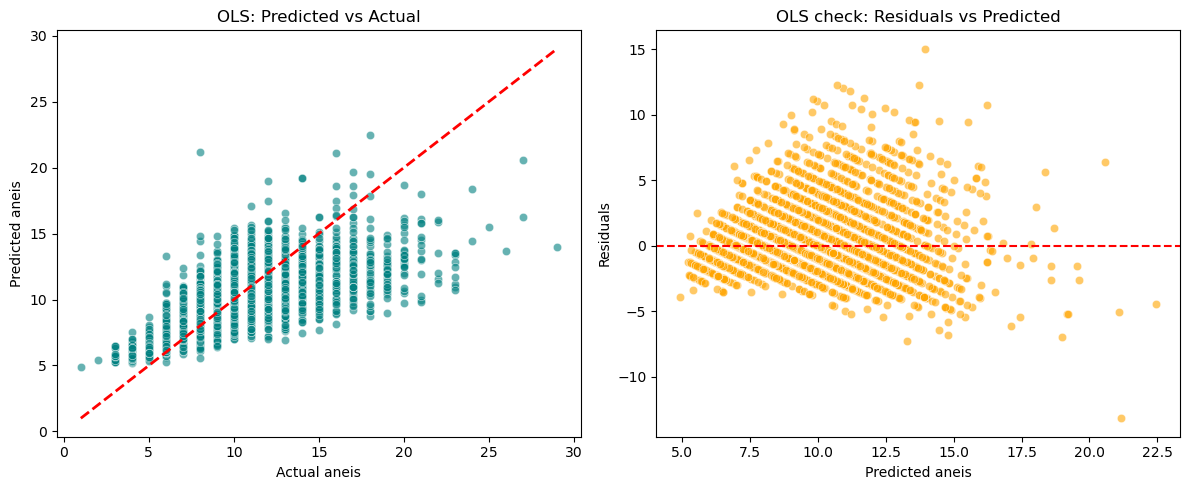

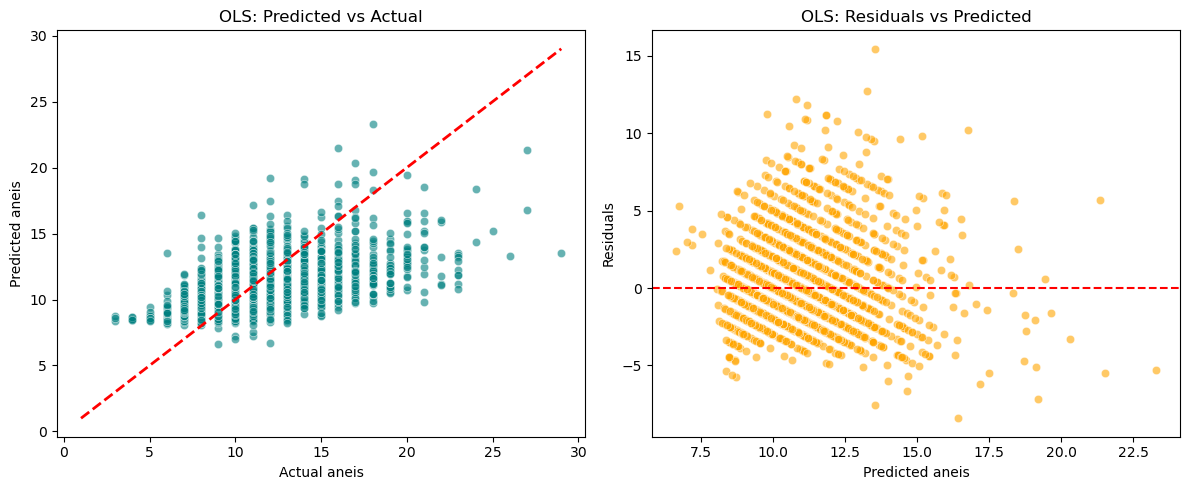

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Choose which model to evaluate ---
# You can switch between `ols` and `ols_check`
model = ols_check
X_eval = X_check  # use the same X as used in fitting

# --- Predictions and residuals ---
y_pred = model.predict(X_eval)
residuals = y - y_pred

# --- Plot: Predicted vs Actual ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y, y=y_pred, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # 1:1 line
plt.xlabel("Actual aneis")
plt.ylabel("Predicted aneis")
plt.title("OLS: Predicted vs Actual")
plt.tight_layout()

# --- Plot: Residuals vs Predicted ---
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted aneis")
plt.ylabel("Residuals")
plt.title("OLS check: Residuals vs Predicted")
plt.tight_layout()

plt.show()

# --- Choose which model to evaluate ---
# You can switch between `ols` and `ols_check`
model = ols
X_eval = X # use the same X as used in fitting

# --- Predictions and residuals ---
y_pred = model.predict(X_eval)
residuals = y - y_pred

# --- Plot: Predicted vs Actual ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y, y=y_pred, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # 1:1 line
plt.xlabel("Actual aneis")
plt.ylabel("Predicted aneis")
plt.title("OLS: Predicted vs Actual")
plt.tight_layout()

# --- Plot: Residuals vs Predicted ---
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted aneis")
plt.ylabel("Residuals")
plt.title("OLS: Residuals vs Predicted")
plt.tight_layout()

plt.show()


In [6]:
# 3.4
from sklearn.preprocessing import StandardScaler

# redefine X to remove scaling from previous
X = s[['peso carne', 'peso visceras', 'peso concha', 'altura', 'diametro', 'sexo_F', 'sexo_M', 'sexo_I', 'comprimento', 'peso total']]


# normalising data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to a DataFrame (to keep column names)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Add the intercept term
X_scaled = sm.add_constant(X_scaled)

print(X_scaled)

# Fit the OLS model
ols_scaled = sm.OLS(y, X_scaled).fit()
print(ols_scaled.summary())


      const  peso carne  peso visceras  peso concha    altura  diametro  \
0       1.0   -0.084626      -0.737528    -0.647678 -0.999465 -0.405457   
1       1.0   -0.084758      -1.193516    -1.221865 -1.237723 -1.412768   
2       1.0   -0.084582      -0.372738    -0.217038 -0.046431  0.098199   
3       1.0   -0.084626      -0.646330    -0.575905 -0.284689 -0.405457   
4       1.0   -0.084769      -1.284714    -1.293638 -1.475982 -1.513499   
...     ...         ...            ...          ...       ...       ...   
4172    1.0   -0.084461       0.539238     0.070055  0.668344  0.400392   
4173    1.0   -0.084384       0.265645     0.141828 -0.046431  0.299661   
4174    1.0   -0.084285       0.995226     0.500695  1.621378  0.702586   
4175    1.0   -0.084285       0.721633     0.428922  0.191827  0.803317   
4176    1.0   -0.083822       1.816005     1.864389  1.383120  1.508435   

        sexo_F    sexo_M    sexo_I  comprimento  peso total  
0    -0.674834  1.316677 -0.688018   

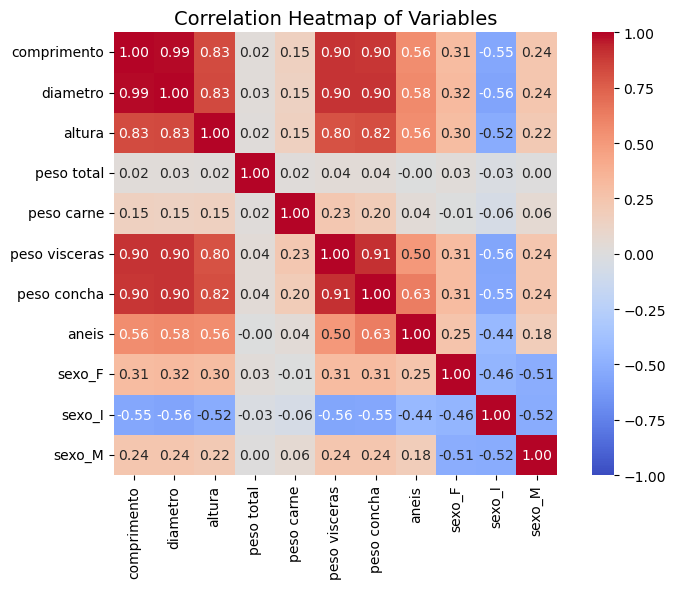

In [7]:
# correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns


# Compute correlation matrix
corr = s.corr(numeric_only=True)

# Set up the figure
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(
    corr,
    annot=True,          # show correlation coefficients
    fmt=".2f",           # format to 2 decimal places
    cmap="coolwarm",     # colour palette
    vmin=-1, vmax=1,     # fixed scale
    square=True
)

plt.title("Correlation Heatmap of Variables", fontsize=14)
plt.tight_layout()
plt.show()


highly correlated column is only diametro and comprimento, so will delete the latter.
peso_total is not correlated with the dp (-0.00) nor is peso carne (0.04)

In [8]:
# reapplying model to see improvements

X = s[['peso visceras', 'peso concha', 'altura', 'diametro', 'sexo_F', 'sexo_M', 'sexo_I']]
y = s['aneis']

# Add constant manually (intercept term)
X = sm.add_constant(X)

ols_rel = sm.OLS(y, X).fit()
print(ols_rel.summary(),"\n")
print("nonremoved ols")
print(ols_check.summary())

                            OLS Regression Results                            
Dep. Variable:                  aneis   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     575.0
Date:                Sat, 25 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:49:53   Log-Likelihood:                -9557.3
No. Observations:                4177   AIC:                         1.913e+04
Df Residuals:                    4170   BIC:                         1.917e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.7691      0.205     18.372

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Select predictors and target
X = s[['peso visceras', 'peso concha', 'altura', 'diametro', 'sexo_F', 'sexo_M', 'sexo_I']]
y = s['aneis']

# Scale numeric predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Base model
lr = LinearRegression()

# RFE: select top k features (chose one to see most important)
rfe = RFE(estimator=lr, n_features_to_select=3)
rfe.fit(X_scaled, y)

# Results
selected_features = X.columns[rfe.support_]
ranking = rfe.ranking_

print("Selected features:", selected_features)
print("Feature ranking (1 = selected):", dict(zip(X.columns, ranking)))
print("Higher ranking = more important")


Selected features: Index(['peso visceras', 'peso concha', 'altura'], dtype='object')
Feature ranking (1 = selected): {'peso visceras': 1, 'peso concha': 1, 'altura': 1, 'diametro': 3, 'sexo_F': 4, 'sexo_M': 5, 'sexo_I': 2}
Higher ranking = more important


higher = more important. least important pruned out already. This suggests an equal importance of gut weight, age and the shell. 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, RFECV, SequentialFeatureSelector
from sklearn.model_selection import cross_val_score, KFold

    # --- Prepare data ---
    X = s[['peso visceras', 'peso concha', 'altura', 'diametro', 'sexo_F', 'sexo_M', 'sexo_I']]
    y = s['aneis']

    model = LinearRegression()
    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # --- 1️⃣ RFE ---
    rfe = RFE(model, n_features_to_select=3)
    rfe.fit(X, y)
    rfe_features = X.columns[rfe.support_]
    rfe_score = cross_val_score(model, X[rfe_features], y, cv=cv, scoring='r2').mean()

    # --- 2️⃣ RFECV ---
    rfecv = RFECV(model, cv=cv, scoring='r2')
    rfecv.fit(X, y)

    # Selected features
    rfecv_features = X.columns[rfecv.support_]
    print("Selected features:", list(rfecv_features))

    # Compute cross-validated R² for RFECV-selected features
    rfecv_score = cross_val_score(model, X[rfecv_features], y, cv=cv, scoring='r2').mean()
    print("RFECV cross-validated R²:", rfecv_score)

    # --- 3️⃣ SFS (forward) ---
    sfs = SequentialFeatureSelector(model, n_features_to_select=3, direction='forward', cv=cv)
    sfs.fit(X, y)
    sfs_features = X.columns[sfs.support_]
    sfs_score = cross_val_score(model, X[sfs_features], y, cv=cv, scoring='r2').mean()

    # --- 3️⃣ SFS (backward) ---
    sfs_b = SequentialFeatureSelector(model, n_features_to_select=3, direction='backward', cv=cv)
    sfs_b.fit(X, y)
    sfs_features_b = X.columns[sfs_b.support_]
    sfs_score_b = cross_val_score(model, X[sfs_features_b], y, cv=cv, scoring='r2').mean()

    # --- 4️⃣ Compare and pick best model ---
    results = pd.DataFrame({
        'Method': ['RFE', 'RFECV', 'SFS (forward)', 'SFS (backward)'],
        'Selected Features': [list(rfe_features), list(rfecv_features), list(sfs_features), list(sfs_features_b)],
        'Cross-validated R²': [rfe_score, rfecv_score, sfs_score, sfs_score_b]
    })

    print(results)

    best_row = results.loc[results['Cross-validated R²'].idxmax()]
    best_method = best_row['Method']
    best_features = best_row['Selected Features']

    print("Best model:", best_method)
    print("Selected features:", best_features)
    print("Cross-validated R²:", best_row['Cross-validated R²'])




IndentationError: unexpected indent (588896398.py, line 9)

using SFS as the cross validation can include all variables and does not seem a fair comparison to the other methods and there's only a marginal difference in the r2 value between SFS and FRECV. Simpler is better with models.

                            OLS Regression Results                            
Dep. Variable:                  aneis   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     1093.
Date:                Sat, 25 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:48:28   Log-Likelihood:                -9605.4
No. Observations:                4177   AIC:                         1.922e+04
Df Residuals:                    4173   BIC:                         1.924e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.4365      0.106     70.089

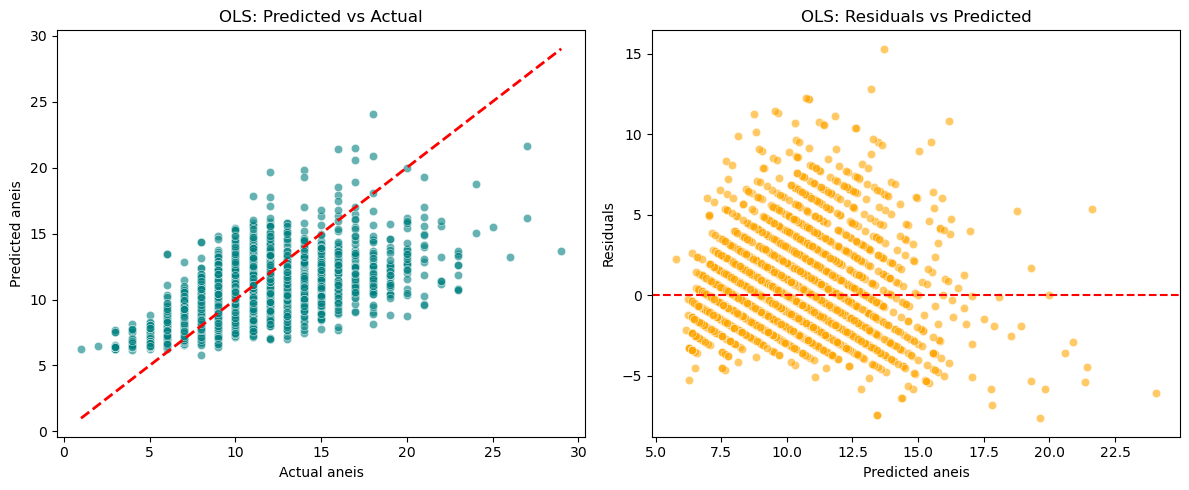

In [14]:
# --- 5️⃣ Fit best model on full data ---

X_best = s[['peso visceras', 'peso concha', 'sexo_I']]
y = s['aneis']

# Add constant manually (intercept term)
X_best = sm.add_constant(X_best)

best_model = sm.OLS(y, X_best).fit()
print(best_model.summary(),"\n")

# --- Predictions and residuals ---
y_pred = best_model.predict(X_best)
residuals = y - y_pred

# --- Plot: Predicted vs Actual ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y, y=y_pred, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # 1:1 line
plt.xlabel("Actual aneis")
plt.ylabel("Predicted aneis")
plt.title("OLS: Predicted vs Actual")
plt.tight_layout()

# --- Plot: Residuals vs Predicted ---
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted aneis")
plt.ylabel("Residuals")
plt.title("OLS: Residuals vs Predicted")
plt.tight_layout()

plt.show()

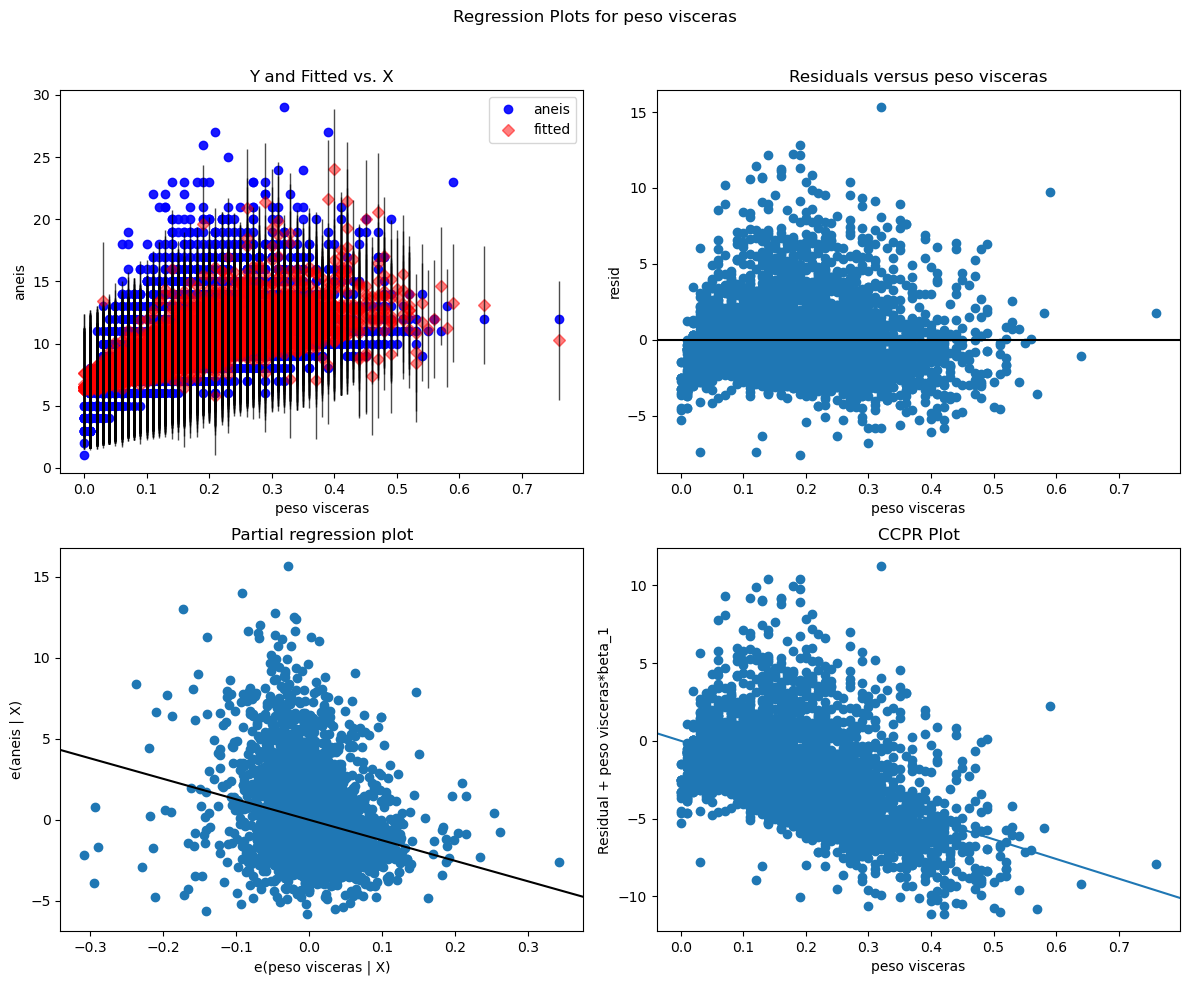

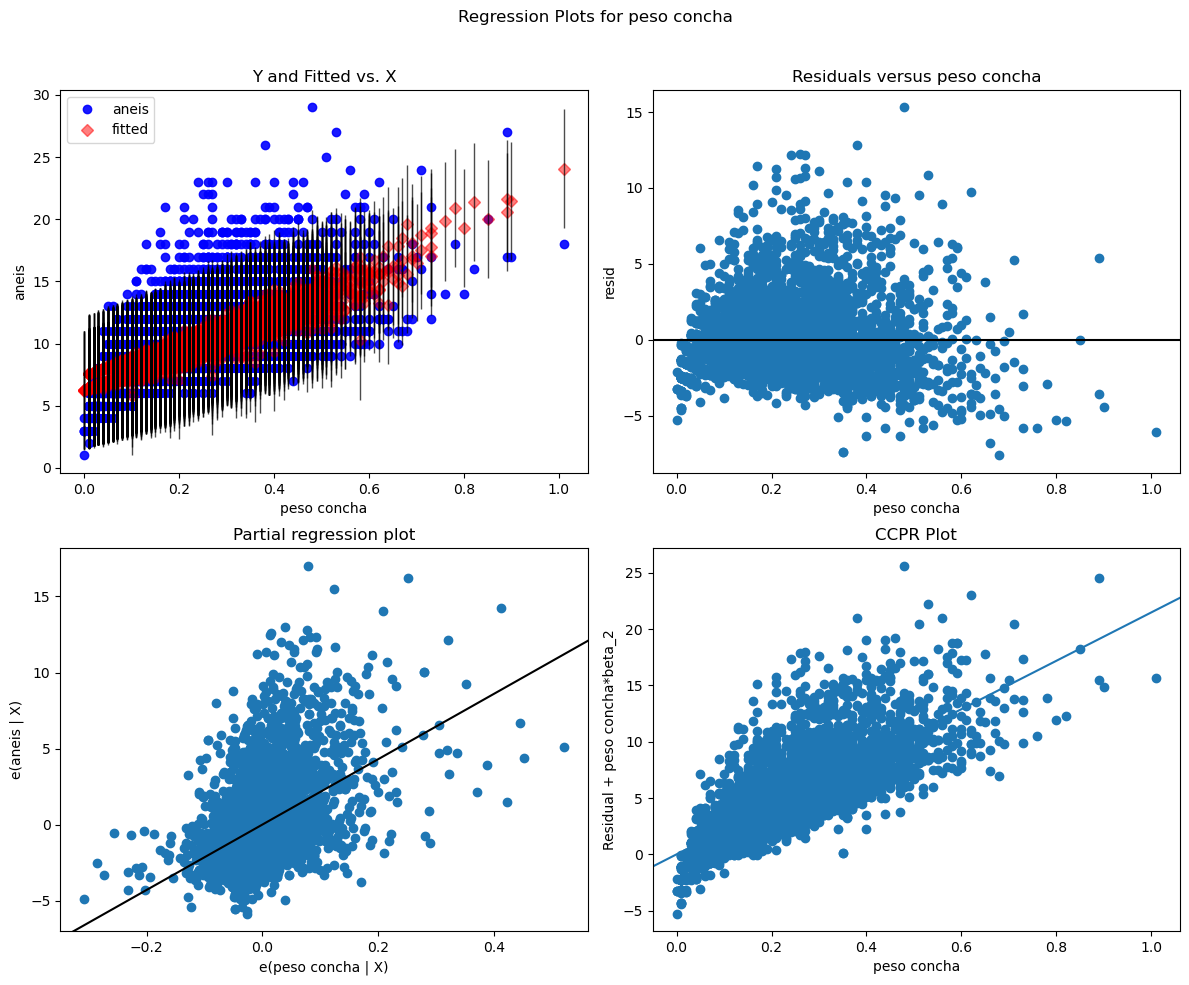

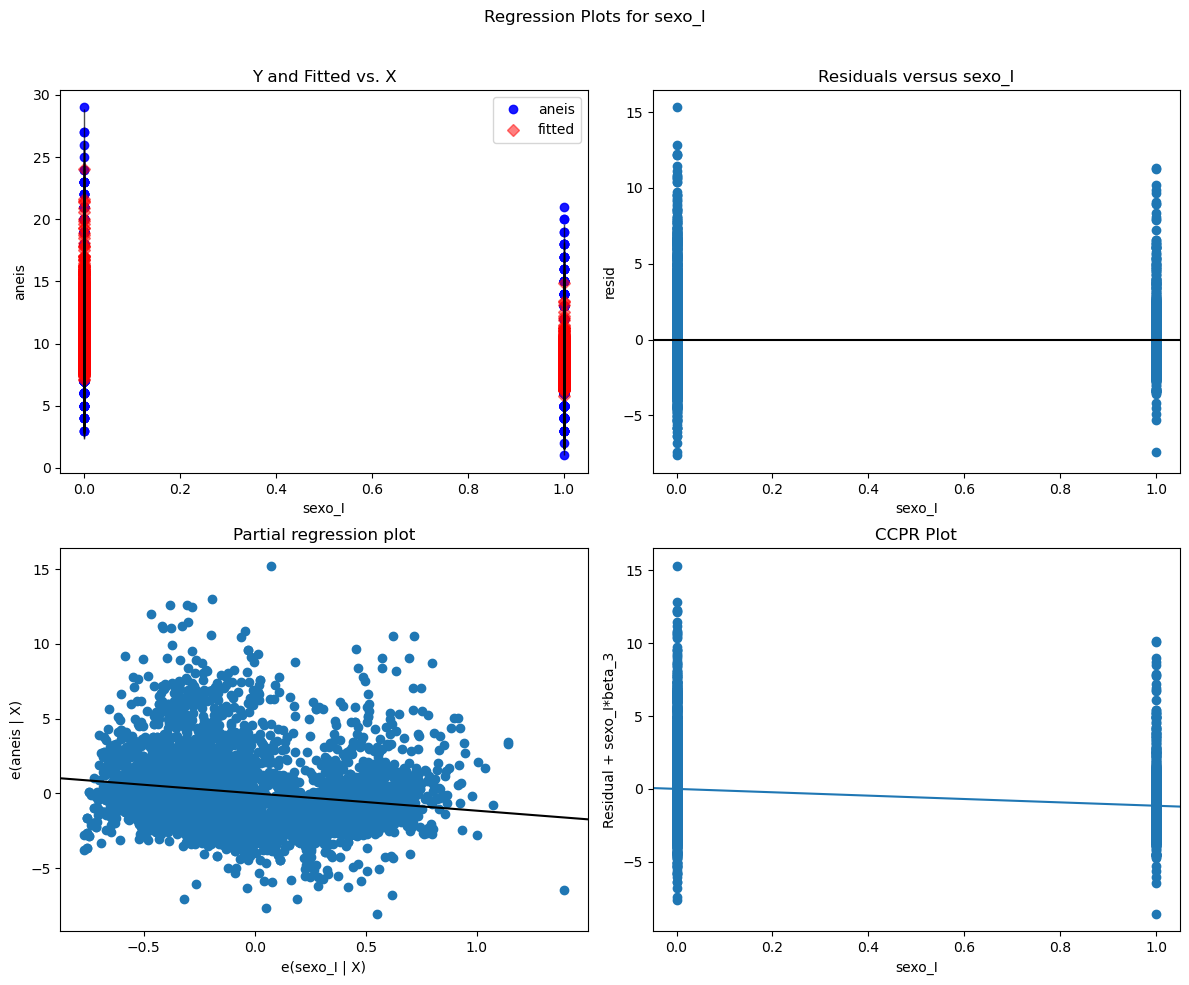

In [15]:
variables = ['peso visceras', 'peso concha', 'sexo_I']
             
for var in variables:
    fig = plt.figure(figsize=(12, 10))
    sm.graphics.plot_regress_exog(best_model, var, fig=fig)
    plt.show()


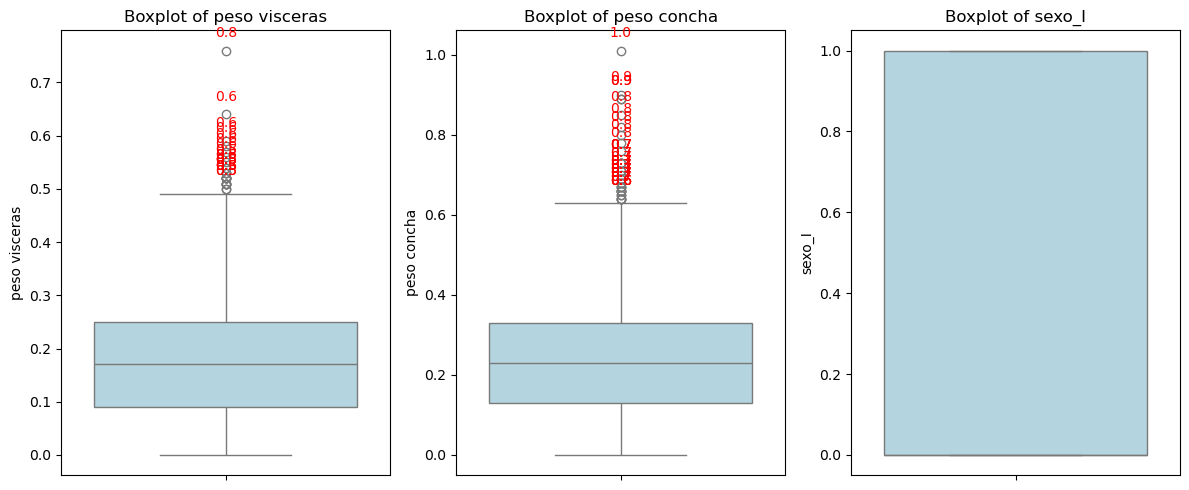

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1️⃣ Boxplots to identify outliers ---
plt.figure(figsize=(12,5))

for i, col in enumerate(X_best.columns[1:], 1):  # skip 'const'
    plt.subplot(1, len(X_best.columns)-1, i)
    sns.boxplot(y=X_best[col], color='lightblue')
    plt.title(f"Boxplot of {col}")
    
    # Annotate outliers
    q1 = X_best[col].quantile(0.25)
    q3 = X_best[col].quantile(0.75)
    iqr = q3 - q1
    outliers = X_best[col][(X_best[col] < q1 - 1.5*iqr) | (X_best[col] > q3 + 1.5*iqr)]
    for value in outliers:
        plt.annotate(f'{value:.1f}', (0, value), textcoords='offset points', xytext=(0,10),
                     ha='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()




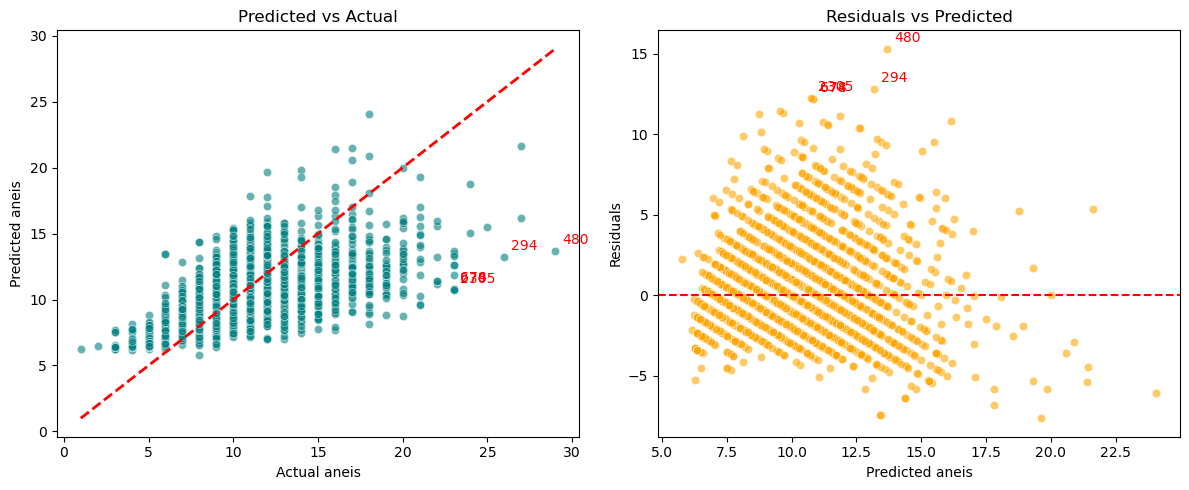

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Compute top residuals ---
residuals_abs = residuals.abs()
top_n = 5  # number of largest residuals to annotate
top_indices = residuals_abs.nlargest(top_n).index

# --- Predicted vs Actual with annotations ---
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x=y, y=y_pred, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual aneis")
plt.ylabel("Predicted aneis")
plt.title("Predicted vs Actual")

# Annotate top residual points
for idx in top_indices:
    plt.annotate(f"{idx}", (y[idx], y_pred[idx]), xytext=(5,5),
                 textcoords='offset points', color='red', fontsize=10)

# --- Residuals vs Predicted with annotations ---
plt.subplot(1,2,2)
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted aneis")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")

# Annotate top residual points
for idx in top_indices:
    plt.annotate(f"{idx}", (y_pred[idx], residuals[idx]), xytext=(5,5),
                 textcoords='offset points', color='red', fontsize=10)

plt.tight_layout()
plt.show()


In [18]:
import statsmodels.api as sm
import numpy as np

# --- Step 1: Identify outliers ---
# We'll use the residuals of your current best_model
residuals_abs = residuals.abs()

# Decide how many top outliers to remove
top_n = 5
outlier_indices = residuals_abs.nlargest(top_n).index
print("Dropping outliers at indices:", outlier_indices.tolist())

# --- Step 2: Drop outliers from the dataset ---
s_clean = s.drop(index=outlier_indices)

X_best_clean = s_clean[['peso visceras', 'peso concha', 'sexo_I']]
y_clean = s_clean['aneis']

# Add constant manually
X_best_clean = sm.add_constant(X_best_clean)

# --- Step 3: Refit OLS without outliers ---
best_model_clean = sm.OLS(y_clean, X_best_clean).fit()
print(best_model_clean.summary())

# --- Step 4: Compute new predictions and residuals ---
y_pred_clean = best_model_clean.predict(X_best_clean)
residuals_clean = y_clean - y_pred_clean


Dropping outliers at indices: [480, 294, 2305, 674, 678]
                            OLS Regression Results                            
Dep. Variable:                  aneis   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     1114.
Date:                Sat, 25 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:48:47   Log-Likelihood:                -9522.4
No. Observations:                4172   AIC:                         1.905e+04
Df Residuals:                    4168   BIC:                         1.908e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

Ok surprised that dropping just 5 outliers improved the model. With an r2 improvement from 0.440 to 0.445 without the outliers.

Ridge coefficients (alpha=0.5):
peso visceras: -13.8870
peso concha: 17.3487
altura: 9.9770
diametro: 4.0830
sexo_F: 0.4273
sexo_M: 0.2664
sexo_I: -0.6937

RidgeCV best alpha: 1.000000
RidgeCV coefficients:
peso visceras: -12.4880
peso concha: 16.5608
altura: 8.6277
diametro: 4.1022
sexo_F: 0.4309
sexo_M: 0.2671
sexo_I: -0.6980

Lasso coefficients (alpha=0.1):
peso visceras: 0.0000
peso concha: 6.7489
altura: 0.0000
diametro: 0.0000
sexo_F: 0.0000
sexo_M: 0.0000
sexo_I: -1.4493

LassoCV best alpha: 0.002683
LassoCV coefficients:
peso visceras: -12.4600
peso concha: 17.6095
altura: 7.8646
diametro: 2.8366
sexo_F: 0.1588
sexo_M: 0.0000
sexo_I: -0.9683



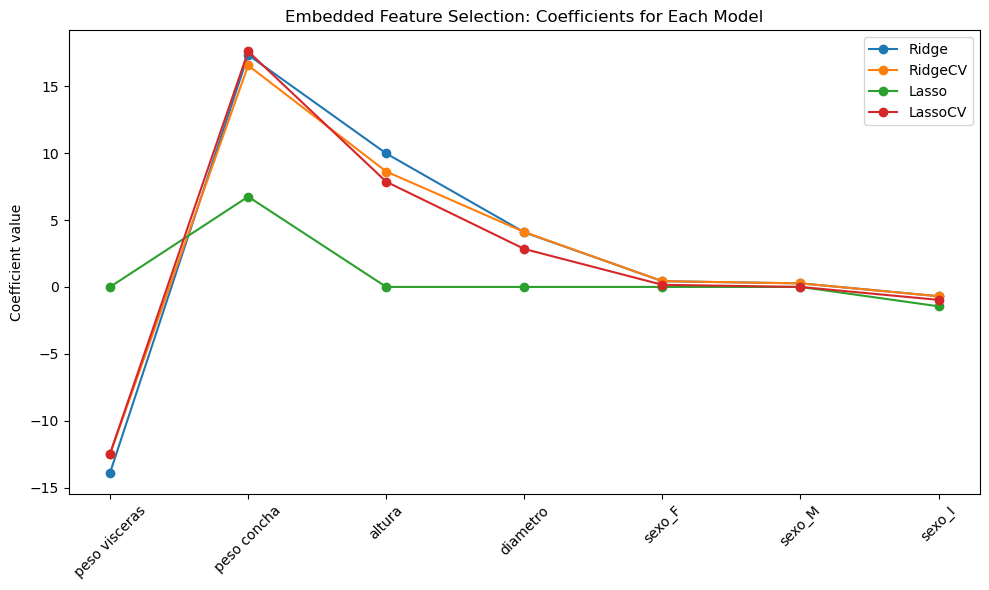

In [19]:
# Q5

import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# --- Define predictors and target ---
X = s[['peso visceras', 'peso concha', 'altura', 'diametro', 'sexo_F', 'sexo_M', 'sexo_I']]
y = s['aneis']

# --- Cross-validation setup ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# --- 1️⃣ Ridge Regression (fixed alpha) ---
ridge = Ridge(alpha=0.5)
ridge.fit(X, y)
print("Ridge coefficients (alpha=0.5):")
for feat, coef in zip(X.columns, ridge.coef_):
    print(f"{feat}: {coef:.4f}")
print()

# --- 2️⃣ RidgeCV (alpha optimized by CV) ---
alphas = np.logspace(-6, 6, 13)
ridge_cv = RidgeCV(alphas=alphas, cv=cv)
ridge_cv.fit(X, y)
print(f"RidgeCV best alpha: {ridge_cv.alpha_:.6f}")
print("RidgeCV coefficients:")
for feat, coef in zip(X.columns, ridge_cv.coef_):
    print(f"{feat}: {coef:.4f}")
print()

# --- 3️⃣ Lasso Regression (fixed alpha) ---
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X, y)
print("Lasso coefficients (alpha=0.1):")
for feat, coef in zip(X.columns, lasso.coef_):
    print(f"{feat}: {coef:.4f}")
print()

# --- 4️⃣ LassoCV (alpha optimized by CV) ---
lasso_alphas = np.logspace(-6, 1, 50)
lasso_cv = LassoCV(alphas=lasso_alphas, cv=cv, max_iter=10000)
lasso_cv.fit(X, y)
print(f"LassoCV best alpha: {lasso_cv.alpha_:.6f}")
print("LassoCV coefficients:")
for feat, coef in zip(X.columns, lasso_cv.coef_):
    print(f"{feat}: {coef:.4f}")
print()

# --- Optional: Visualize coefficients ---
plt.figure(figsize=(10,6))
models = [ridge, ridge_cv, lasso, lasso_cv]
model_names = ['Ridge', 'RidgeCV', 'Lasso', 'LassoCV']
for i, model in enumerate(models):
    plt.plot(X.columns, model.coef_, marker='o', label=model_names[i])
plt.xticks(rotation=45)
plt.ylabel("Coefficient value")
plt.title("Embedded Feature Selection: Coefficients for Each Model")
plt.legend()
plt.tight_layout()
plt.show()


c:\Users\chloe\anaconda3\Lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
c:\Users\chloe\anaconda3\Lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
c:\Users\chloe\anaconda3\Lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
c:\Users\chloe\anaconda3\Lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
c:\Users\chloe\anaconda3\Lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
c:\Users\chloe\anaconda3\Lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  mul

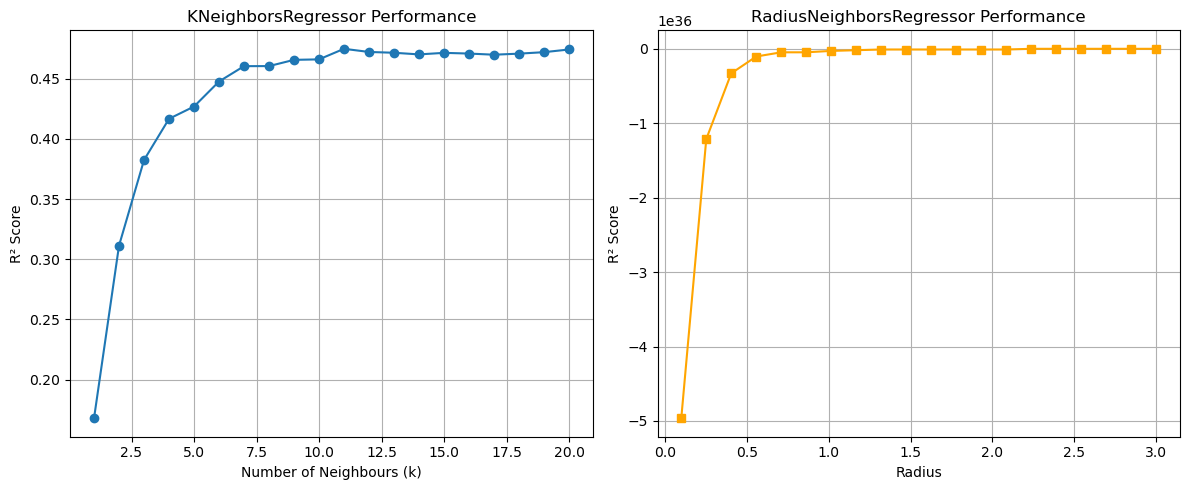

Best KNeighborsRegressor: k=11, R²=0.475
Best RadiusNeighborsRegressor: radius=2.237, R²=0.384


In [21]:
# --- Imports ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# --- Standardise data (if not already) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = y  # target left unscaled for interpretability

# --- Split into train/test ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# --- 1️⃣ KNeighborsRegressor ---
k_values = range(1, 21)
r2_knn = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    r2_knn.append(r2_score(y_test, y_pred))

# --- 2️⃣ RadiusNeighborsRegressor ---
radii = np.linspace(0.1, 3.0, 20)
r2_radius = []

for r in radii:
    rnn = RadiusNeighborsRegressor(radius=r)
    rnn.fit(X_train, y_train)
    y_pred = rnn.predict(X_test)

    # Handle NaN predictions (no neighbours found)
    if np.isnan(y_pred).any():
        y_pred = np.nan_to_num(y_pred, nan=np.mean(y_train))
    
    r2_radius.append(r2_score(y_test, y_pred))

# --- 3️⃣ Plot results ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, r2_knn, marker='o')
plt.xlabel("Number of Neighbours (k)")
plt.ylabel("R² Score")
plt.title("KNeighborsRegressor Performance")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(radii, r2_radius, marker='s', color='orange')
plt.xlabel("Radius")
plt.ylabel("R² Score")
plt.title("RadiusNeighborsRegressor Performance")
plt.grid(True)

plt.tight_layout()
plt.show()

# --- 4️⃣ Print best results ---
best_k = k_values[np.argmax(r2_knn)]
best_r = radii[np.argmax(r2_radius)]

print(f"Best KNeighborsRegressor: k={best_k}, R²={max(r2_knn):.3f}")
print(f"Best RadiusNeighborsRegressor: radius={best_r:.3f}, R²={max(r2_radius):.3f}")
